CSV file 'customer_purchase_history.csv' has been created!
Loaded Data:
   CustomerID  TotalAmountSpent  NumberOfTransactions
0           1               200                     5
1           2               400                    10
2           3               100                     2
3           4               300                     7
4           5               500                    12
5           6               250                     6
6           7               450                    11
7           8               350                     9
8           9               120                     3
9          10               380                     8

Clustered Data:
   CustomerID  TotalAmountSpent  NumberOfTransactions  Cluster
0           1               200                     5        1
1           2               400                    10        2
2           3               100                     2        1
3           4               300                     7        0
4 

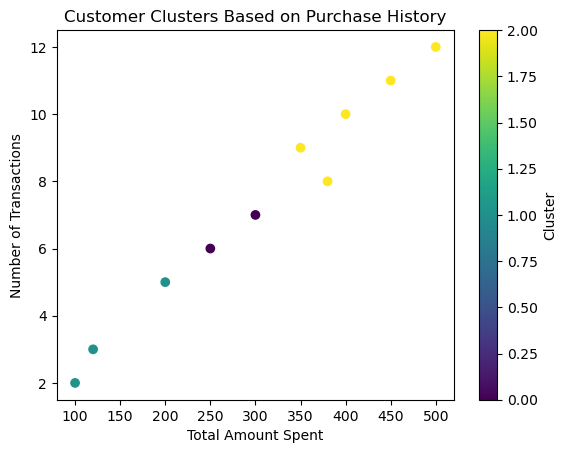

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Create a CSV File with Sample Customer Data
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'TotalAmountSpent': [200, 400, 100, 300, 500, 250, 450, 350, 120, 380],
    'NumberOfTransactions': [5, 10, 2, 7, 12, 6, 11, 9, 3, 8]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = 'customer_purchase_history.csv'
df.to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' has been created!")

# Step 2: Load the CSV File
df = pd.read_csv(csv_filename)

# Display the loaded data to confirm
print("Loaded Data:")
print(df)

# Step 3: Perform K-Means Clustering
X = df[['TotalAmountSpent', 'NumberOfTransactions']]

# Initialize K-Means (3 clusters in this example)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster for each customer
df['Cluster'] = kmeans.predict(X)

# Step 4: Print the clustered data
print("\nClustered Data:")
print(df)

# Step 5: Visualize the clusters
plt.scatter(df['TotalAmountSpent'], df['NumberOfTransactions'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Transactions')
plt.title('Customer Clusters Based on Purchase History')
plt.colorbar(label='Cluster')
plt.show()
